## Columns of the dataset:

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
    Blood Pressure: Diastolic blood pressure (mm Hg)
    Skin Thickness: Triceps skin fold thickness (mm
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2) 
    Diabetes Pedigree Function: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

In [31]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt


In [39]:
import missingno as msno
%matplotlib inline

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. Please do the basic exploration of data and explain missing values, number of rows and columns and data types in statistical term.

No. of columns : 768

No. of rows : 9

Data type of each column : int64 = 5 ,float64 = 2 , category = 1

    Pregnancies                   int64
    Glucose                       int64
    BloodPressure                 int64
    SkinThickness                 int64
    Insulin                       int64
    BMI                         float64
    DiabetesPedigreeFunction    float64
    Age                           int64
    Outcome                       category
Missing Values of columns :

    Glucose                       5
    BloodPressure                35
    SkinThickness               227
    Insulin                     374
    BMI                          11

Dataset contain three type of columns:

    int64 = 5
    float64 = 2 
    category = 1

Outcome column has two value here :

     0 = False (Not Diabetics)
 
     1 = True (Diabetics)
 
There are total five columns which contain missing values.They are Insulin ,SkinThickness ,BloodPressure ,BMI and Glucose.

Insulin column has highest amount of missing value which is near to 47 precentage.

In [57]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
len(df.columns)

9

In [8]:
len(df)

768

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [151]:
df = df.astype({"Outcome":'category'})

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   763 non-null    float64 
 2   BloodPressure             733 non-null    float64 
 3   SkinThickness             541 non-null    float64 
 4   Insulin                   394 non-null    float64 
 5   BMI                       757 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    float64 
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 49.0 KB


In [15]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

There are very limited possibility of zero value of following columns(mentioted above) so we have to replace value zero with NaN.

In [24]:
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan}) 

In [25]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
percent_missing = df.isnull().sum() * 100 / len(df)

Text(0.5, 1.0, 'Precentage_Missing_Values_Per_Column')

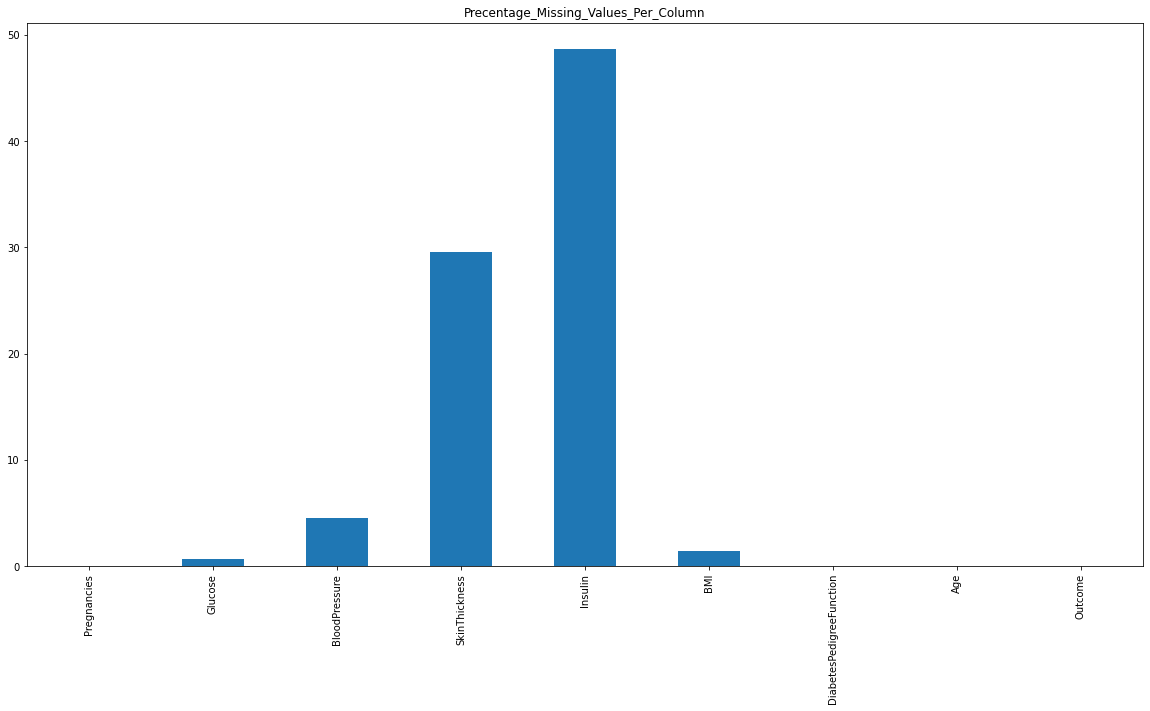

In [55]:
percent_missing.plot.bar(figsize=(20, 10))
plt.title('Precentage_Missing_Values_Per_Column')

<AxesSubplot:>

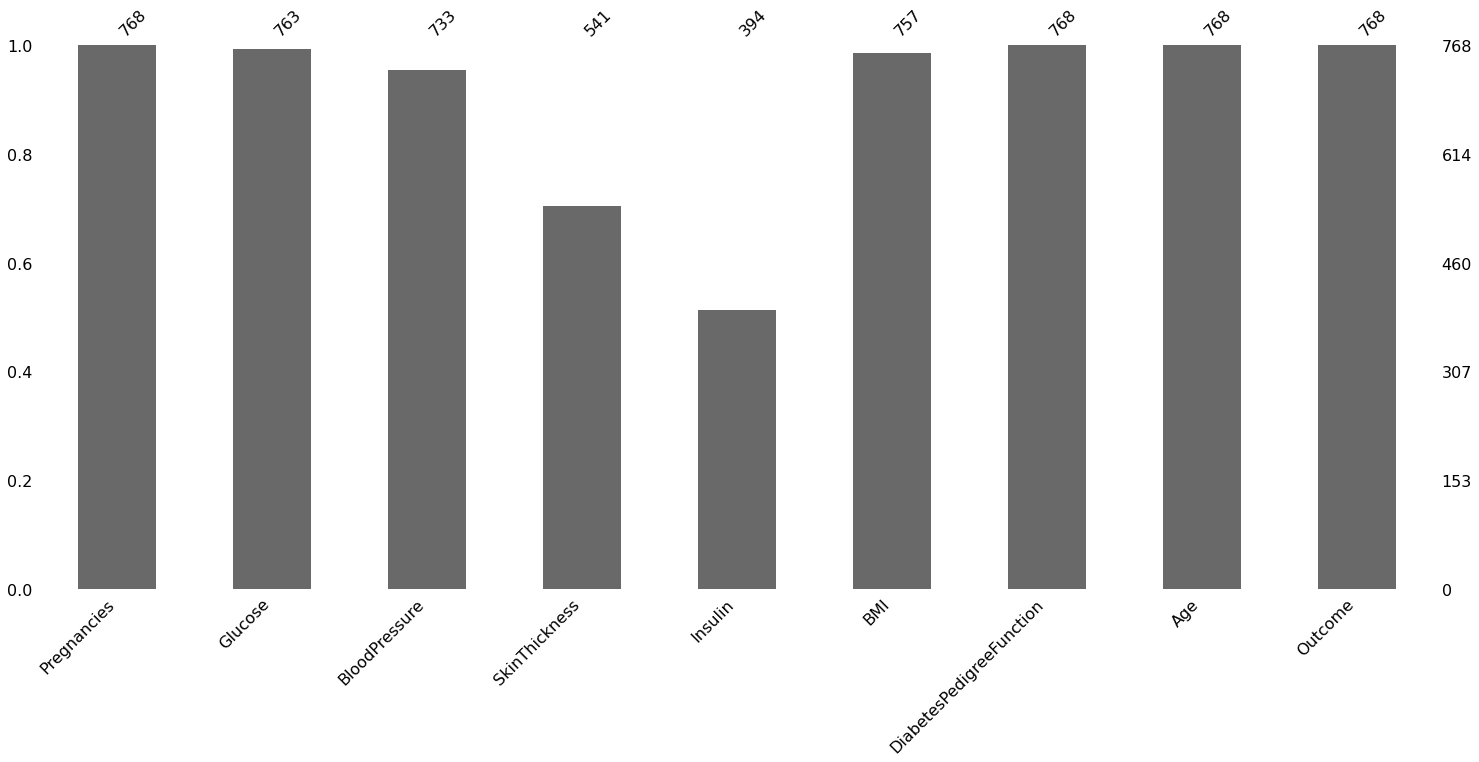

In [43]:
msno.bar(df) # missing value of  whole datframe

## Analysis:

### 2.Calculate appropriate measures of central tendency for Glucose and outcome column only?

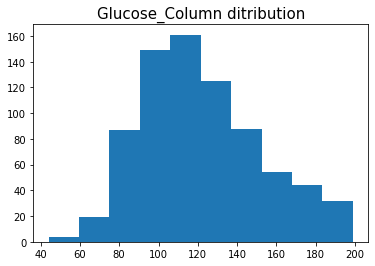

In [85]:
x = df['Glucose']
plt.hist(x)
plt.title("Glucose_Column ditribution", fontsize= 15)
plt.show()

Text(0.5, 1.0, 'Glucose_Column ditribution')

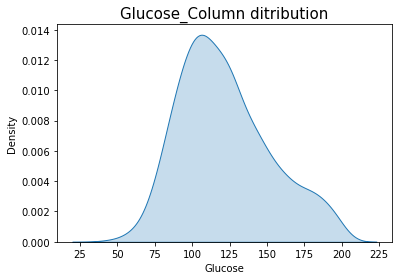

In [84]:
sns.kdeplot(x,shade=True)
plt.title("Glucose_Column ditribution", fontsize= 15)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

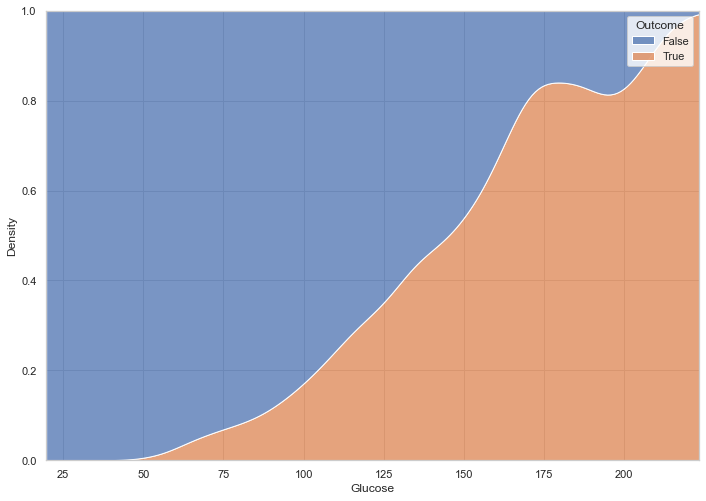

In [145]:
sns.kdeplot(data=df, x="Glucose", hue="Outcome", multiple="fill")

As we can see that with help of kde , histogram plot data is symmetrical.

We can use mean  as measures of central tendency for Glucose column.

Mean value of Glucose column is 121.69.

In [83]:
print ("Mean Values in the Distribution of Glucose Column")
df['Glucose'].mean()

Mean Values in the Distribution of Glucose Column


121.6867627785059

The category column is bool type which is true or false.So ,we going to use mode measures of central tendency.

The mode for catogery column value of Zero/False.

Here means majority of people are non - daibetic. 

In [70]:
print ("Mode of Outcome Column")
df['Outcome'].mode()

Mean Values in the Distribution


0    False
dtype: bool

### 3.Please provide 5 points data summaries for required columns?

In [127]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")

<AxesSubplot:>

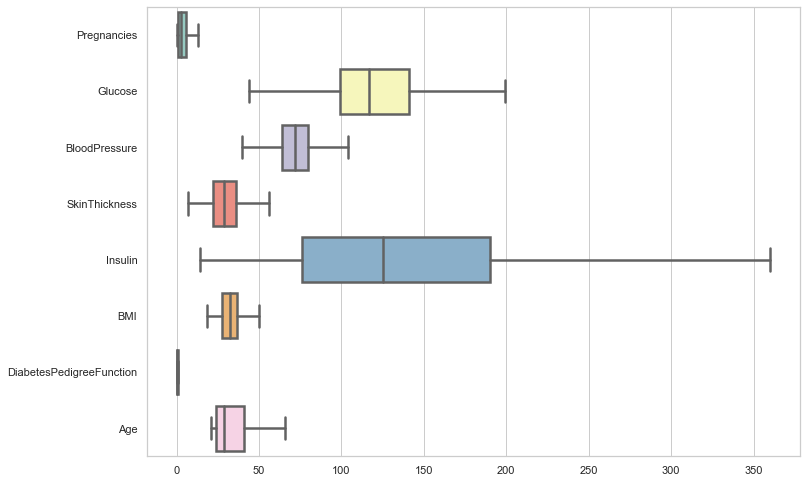

In [146]:
sns.boxplot(data=df,palette="Set3",linewidth=2.5,orient="h",showfliers=False)

In [110]:
df.agg('max')

Pregnancies                    17
Glucose                     199.0
BloodPressure               122.0
SkinThickness                99.0
Insulin                     846.0
BMI                          67.1
DiabetesPedigreeFunction     2.42
Age                          81.0
Outcome                      True
dtype: object

In [98]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [114]:
sns.set(rc={'figure.figsize':(4,2)})

<AxesSubplot:xlabel='BloodPressure'>

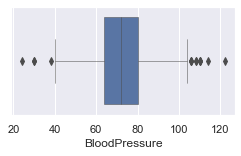

In [115]:
sns.boxplot(x='BloodPressure',data =df,linewidth=0.5,orient="h")

<AxesSubplot:xlabel='Glucose'>

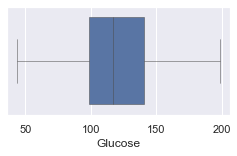

In [116]:
sns.boxplot(x='Glucose',data =df,linewidth=0.5,orient="h")

<AxesSubplot:xlabel='SkinThickness'>

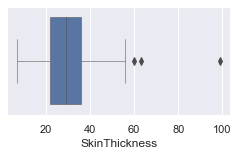

In [117]:
sns.boxplot(x='SkinThickness',data =df,linewidth=0.5,orient="h")

<AxesSubplot:xlabel='Insulin'>

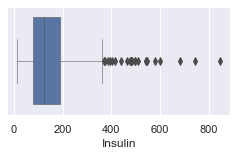

In [118]:
sns.boxplot(x='Insulin',data =df,linewidth=0.5,orient="h")

<AxesSubplot:xlabel='BMI'>

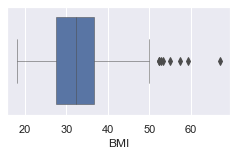

In [119]:
sns.boxplot(x='BMI',data =df,linewidth=0.5,orient="h")

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

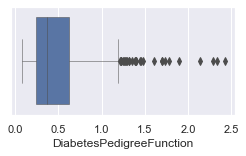

In [121]:
sns.boxplot(x='DiabetesPedigreeFunction',data =df,linewidth=0.5,orient="h")

<AxesSubplot:xlabel='Age'>

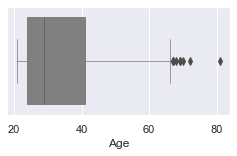

In [125]:
sns.boxplot(x='Age',data =df,linewidth=0.5,orient="h",color=".50")

<AxesSubplot:xlabel='Pregnancies'>

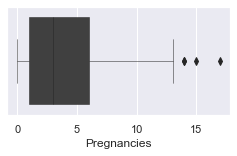

In [124]:
sns.boxplot(x='Pregnancies',data =df,linewidth=0.5,orient="h",color=".25")

### 4.Please create an appropriate plot to examine the relationship between Age and Glucose.

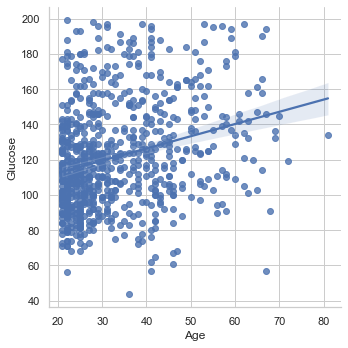

In [142]:
sns.lmplot(x="Age", y="Glucose",data=df,fit_reg=True)

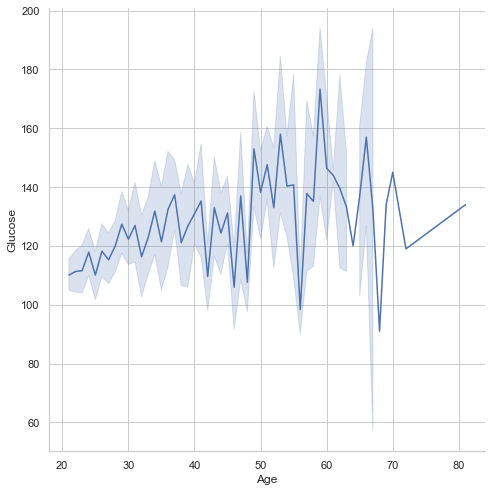

In [141]:
sns.relplot(x="Age", y="Glucose", kind="line",height=7, data=df)

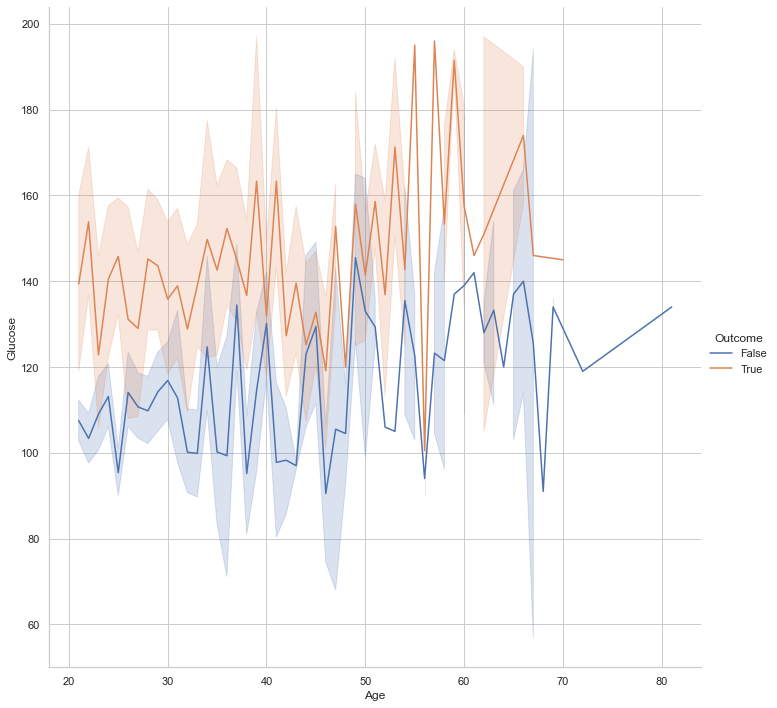

In [147]:
sns.relplot(x="Age", y="Glucose",hue="Outcome", kind="line",height=10, data=df)

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=df);

### 5.Please create an appropriate plot to see the distribution of Outcome variable?

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

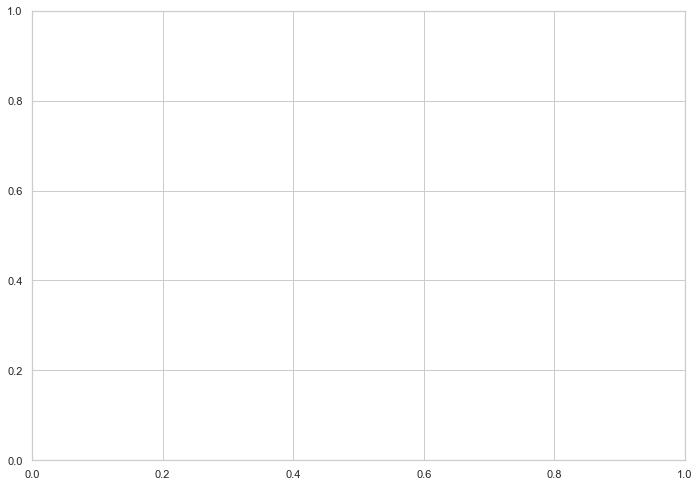

In [152]:
df['Outcome'].hist()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

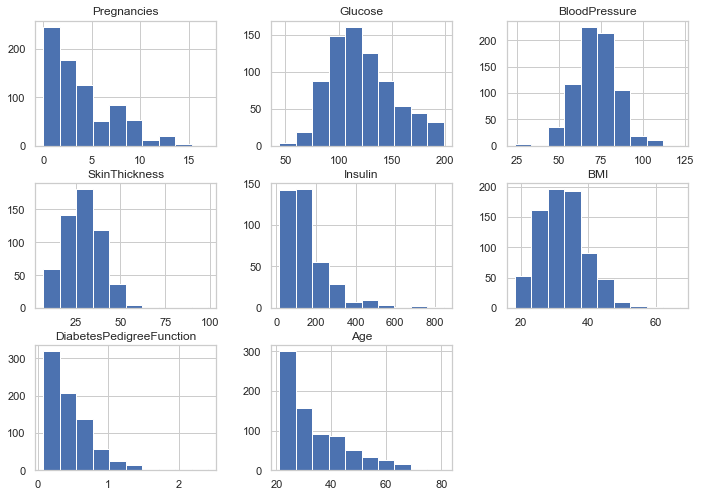

In [153]:
df.hist()

### 6.Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.

### 7.Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.

### 8.Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.

### 9.What should be the measures of central tendency and dispersion for skewed data? 